In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials

import io

# auth.authenticate_user()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Insert dataset from my drive
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/trx_data - Sheet1.csv')

In [ ]:
#checking dataset
df

,invoice_id,customer_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin_ratio,gross_income,rating
0,765-26-6951,12,A,Yangon,Normal,Male,Sports and travel,"72,61",6,"21,783","457,443",1/1/2019,10:39,Credit card,"435,66","4,761904762","21,783","6,9"
1,530-90-9855,54,A,Yangon,Member,Male,Home and lifestyle,"47,59",8,"19,036","399,756",1/1/2019,14:47,Cash,"380,72","4,761904762","19,036","5,7"
2,891-01-7034,115,B,Mandalay,Normal,Female,Electronic accessories,"74,71",6,"22,413","470,673",1/1/2019,19:07,Cash,"448,26","4,761904762","22,413","6,7"
3,493-65-6248,237,C,Naypyitaw,Member,Female,Sports and travel,"36,98",10,"18,49","388,29",1/1/2019,19:48,Credit card,"369,8","4,761904762","18,49",7
4,556-97-7101,187,C,Naypyitaw,Normal,Female,Electronic accessories,"63,22",2,"6,322","132,762",1/1/2019,15:51,Cash,"126,44","4,761904762","6,322","8,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,642-61-4706,139,B,Mandalay,Member,Male,Food and beverages,"93,4",2,"9,34","196,14",3/30/2019,16:34,Cash,"186,8","4,761904762","9,34","5,5"
1822,115-38-7388,224,C,Naypyitaw,Member,Female,Fashion accessories,"10,18",8,"4,072","85,512",3/30/2019,12:51,Credit card,"81,44","4,761904762","4,072","9,5"
1823,291-55-6563,63,A,Yangon,Member,Female,Home and lifestyle,"34,42",6,"10,326","216,846",3/30/2019,12:45,Ewallet,"206,52","4,761904762","10,326","7,5"
1824,361-85-2571,36,A,Yangon,Normal,Female,Sports and travel,"89,48",5,"22,37","469,77",3/30/2019,10:18,Cash,"447,4","4,761904762","22,37","7,4"


In [ ]:
#Checking the number of null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   invoice_id          1826 non-null   object
 1   customer_id         1826 non-null   int64 
 2   branch              1826 non-null   object
 3   city                1826 non-null   object
 4   customer_type       1826 non-null   object
 5   gender              1826 non-null   object
 6   product_line        1826 non-null   object
 7   unit_price          1826 non-null   object
 8   quantity            1826 non-null   int64 
 9   tax                 1826 non-null   object
 10  total               1826 non-null   object
 11  date                1826 non-null   object
 12  time                1826 non-null   object
 13  payment             1826 non-null   object
 14  cogs                1826 non-null   object
 15  gross_margin_ratio  1826 non-null   object
 16  gross_income        1826

In [ ]:
#Replace data type that before is object to float
df['gross_income'] = df['gross_income'].str.replace(',', '.').astype(float)
df['tax'] = df['tax'].str.replace(',', '.').astype(float)
df['total'] = df['total'].str.replace(',', '.').astype(float)
df['cogs'] = df['cogs'].str.replace(',', '.').astype(float)
df['unit_price'] = df['unit_price'].str.replace(',', '.').astype(float)
df['gross_margin_ratio'] = df['gross_margin_ratio'].str.replace(',', '.').astype(float)
df['rating'] = df['rating'].str.replace(',','.').astype(float)

In [ ]:
df

,invoice_id,customer_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin_ratio,gross_income,rating
0,765-26-6951,12,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,1/1/2019,10:39,Credit card,435.66,4.761905,21.783,6.9
1,530-90-9855,54,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,1/1/2019,14:47,Cash,380.72,4.761905,19.036,5.7
2,891-01-7034,115,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.413,470.673,1/1/2019,19:07,Cash,448.26,4.761905,22.413,6.7
3,493-65-6248,237,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,1/1/2019,19:48,Credit card,369.80,4.761905,18.490,7.0
4,556-97-7101,187,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,1/1/2019,15:51,Cash,126.44,4.761905,6.322,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,642-61-4706,139,B,Mandalay,Member,Male,Food and beverages,93.40,2,9.340,196.140,3/30/2019,16:34,Cash,186.80,4.761905,9.340,5.5
1822,115-38-7388,224,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,3/30/2019,12:51,Credit card,81.44,4.761905,4.072,9.5
1823,291-55-6563,63,A,Yangon,Member,Female,Home and lifestyle,34.42,6,10.326,216.846,3/30/2019,12:45,Ewallet,206.52,4.761905,10.326,7.5
1824,361-85-2571,36,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,3/30/2019,10:18,Cash,447.40,4.761905,22.370,7.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   invoice_id          1826 non-null   object 
 1   customer_id         1826 non-null   int64  
 2   branch              1826 non-null   object 
 3   city                1826 non-null   object 
 4   customer_type       1826 non-null   object 
 5   gender              1826 non-null   object 
 6   product_line        1826 non-null   object 
 7   unit_price          1826 non-null   float64
 8   quantity            1826 non-null   int64  
 9   tax                 1826 non-null   float64
 10  total               1826 non-null   float64
 11  date                1826 non-null   object 
 12  time                1826 non-null   object 
 13  payment             1826 non-null   object 
 14  cogs                1826 non-null   float64
 15  gross_margin_ratio  1826 non-null   float64
 16  gross_

In [ ]:
#Checking statistic from the dataset
df.describe()

,customer_id,unit_price,quantity,tax,total,cogs,gross_margin_ratio,gross_income,rating
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,119.585980,55.289978,5.448521,15.056766,316.192084,301.135318,4.761905,15.056766,6.970756
std,70.054683,26.482558,2.926465,11.576490,243.106298,231.529808,0.000000,11.576490,1.717669
min,1.000000,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,58.250000,32.355000,3.000000,5.789250,121.574250,115.785000,4.761905,5.789250,5.500000
50%,118.000000,54.700000,5.000000,11.790000,247.590000,235.800000,4.761905,11.790000,6.900000
75%,180.000000,77.492500,8.000000,21.975125,461.477625,439.502500,4.761905,21.975125,8.500000
max,240.000000,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


In [ ]:
#Checking the total number of null
df.isnull().sum()

,0
invoice_id,0
customer_id,0
branch,0
city,0
customer_type,0
gender,0
product_line,0
unit_price,0
quantity,0
tax,0


In [ ]:
#Checking the unique value
df.nunique()

,0
invoice_id,1000
customer_id,240
branch,3
city,3
customer_type,2
gender,2
product_line,6
unit_price,943
quantity,10
tax,990


In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

##Data Cleaning

In [ ]:
# Check for duplicates based on 'invoice_id'
duplicate_invoices = df[df.duplicated(subset='invoice_id', keep=False)]

 # Number of unique duplicate invoice ids
num_duplicate_invoices = duplicate_invoices['invoice_id'].nunique()

# List of duplicate invoice ids
duplicate_invoice_list = duplicate_invoices['invoice_id'].unique()

#a. banyak invoice yang memiliki duplikat dan list
num_duplicate_invoices, duplicate_invoice_list


(826,
 array(['530-90-9855', '891-01-7034', '493-65-6248', '556-97-7101',
        '133-14-7229', '651-88-7328', '182-52-7000', '416-17-9926',
        '271-77-8740', '770-42-8960', '746-04-1077', '446-47-6729',
        '244-08-0162', '198-84-7132', '744-09-5786', '712-39-0363',
        '345-68-9016', '670-71-7306', '749-24-1565', '687-15-1097',
        '422-29-8786', '343-87-0864', '875-31-8302', '501-61-1753',
        '552-44-5977', '672-51-8681', '656-16-1063', '731-14-2199',
        '725-32-9708', '132-23-6451', '217-58-1179', '144-51-6085',
        '843-01-4703', '573-98-8548', '209-61-0206', '339-12-4827',
        '841-18-8232', '801-88-0346', '433-08-7822', '489-82-1237',
        '704-11-6354', '490-29-1201', '834-25-9262', '662-72-2873',
        '826-58-8051', '729-06-2010', '852-82-2749', '846-10-0341',
        '799-71-1548', '126-54-1082', '566-19-5475', '526-86-8552',
        '889-04-9723', '541-48-8554', '390-31-6381', '571-94-0759',
        '750-57-9686', '192-98-7397', '674

In [ ]:
duplicate_invoices

,invoice_id,customer_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin_ratio,gross_income,rating
1,530-90-9855,54,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7
2,891-01-7034,115,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.413,470.673,2019-01-01,19:07,Cash,448.26,4.761905,22.413,6.7
3,493-65-6248,237,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,2019-01-01,19:48,Credit card,369.80,4.761905,18.490,7.0
4,556-97-7101,187,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,2019-01-01,15:51,Cash,126.44,4.761905,6.322,8.5
5,133-14-7229,177,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,642-61-4706,139,B,Mandalay,Member,Male,Food and beverages,93.40,2,9.340,196.140,2019-03-30,16:34,Cash,186.80,4.761905,9.340,5.5
1822,115-38-7388,224,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12:51,Credit card,81.44,4.761905,4.072,9.5
1823,291-55-6563,63,A,Yangon,Member,Female,Home and lifestyle,34.42,6,10.326,216.846,2019-03-30,12:45,Ewallet,206.52,4.761905,10.326,7.5
1824,361-85-2571,36,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,10:18,Cash,447.40,4.761905,22.370,7.4


###Remove Duplicate


In [ ]:
# Remove duplicate rows based on 'invoice_id'
cleaned_data = df.drop_duplicates(subset='invoice_id')

# Sort data by 'invoice_id' and 'customer_id' in ascending order
cleaned_data = cleaned_data.sort_values(by=['invoice_id', 'customer_id'])

#b. cleansing data and sorted data
cleaned_data

,invoice_id,customer_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin_ratio,gross_income,rating
1473,101-17-6199,8,A,Yangon,Normal,Male,Food and beverages,45.79,7,16.0265,336.5565,2019-03-13,19:44,Credit card,320.53,4.761905,16.0265,7.0
315,101-81-4070,236,C,Naypyitaw,Member,Female,Health and beauty,62.82,2,6.2820,131.9220,2019-01-17,12:36,Ewallet,125.64,4.761905,6.2820,4.9
1630,102-06-2002,215,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,6.3125,132.5625,2019-03-20,17:52,Cash,126.25,4.761905,6.3125,6.1
1318,102-77-2261,206,C,Naypyitaw,Member,Male,Health and beauty,65.31,7,22.8585,480.0285,2019-03-05,18:02,Credit card,457.17,4.761905,22.8585,4.2
1173,105-10-6182,48,A,Yangon,Member,Male,Fashion accessories,21.48,2,2.1480,45.1080,2019-02-27,12:22,Ewallet,42.96,4.761905,2.1480,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,894-41-5205,198,C,Naypyitaw,Normal,Female,Food and beverages,43.18,8,17.2720,362.7120,2019-01-19,19:39,Credit card,345.44,4.761905,17.2720,8.3
976,895-03-6665,115,B,Mandalay,Normal,Female,Fashion accessories,36.51,9,16.4295,345.0195,2019-02-16,10:52,Cash,328.59,4.761905,16.4295,4.2
1308,895-66-0685,138,B,Mandalay,Member,Male,Food and beverages,18.08,3,2.7120,56.9520,2019-03-05,19:46,Ewallet,54.24,4.761905,2.7120,8.0
513,896-34-0956,15,A,Yangon,Normal,Male,Fashion accessories,21.32,1,1.0660,22.3860,2019-01-26,12:43,Cash,21.32,4.761905,1.0660,5.9


In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1473 to 1592
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   invoice_id          1000 non-null   object        
 1   customer_id         1000 non-null   int64         
 2   branch              1000 non-null   object        
 3   city                1000 non-null   object        
 4   customer_type       1000 non-null   object        
 5   gender              1000 non-null   object        
 6   product_line        1000 non-null   object        
 7   unit_price          1000 non-null   float64       
 8   quantity            1000 non-null   int64         
 9   tax                 1000 non-null   float64       
 10  total               1000 non-null   float64       
 11  date                1000 non-null   datetime64[ns]
 12  time                1000 non-null   object        
 13  payment             1000 non-null   object        

In [ ]:
#Checking statistic the dataset after data cleansing and data manipulating
cleaned_data.describe().style.background_gradient(cmap='Oranges') #for colored output

,customer_id,unit_price,quantity,tax,total,date,cogs,gross_margin_ratio,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.721000,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.587380,4.761905,15.379369,6.972700
min,1.000000,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.170000,4.761905,0.508500,4.000000
25%,59.000000,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.497500,4.761905,5.924875,5.500000
50%,119.000000,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.760000,4.761905,12.088000,7.000000
75%,181.000000,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.905000,4.761905,22.445250,8.500000
max,240.000000,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.000000,4.761905,49.650000,10.000000
std,70.358720,26.494628,2.923431,11.708825,245.885335,nan,234.176510,0.000000,11.708825,1.718580


In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1473 to 1592
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   invoice_id          1000 non-null   object        
 1   customer_id         1000 non-null   int64         
 2   branch              1000 non-null   object        
 3   city                1000 non-null   object        
 4   customer_type       1000 non-null   object        
 5   gender              1000 non-null   object        
 6   product_line        1000 non-null   object        
 7   unit_price          1000 non-null   float64       
 8   quantity            1000 non-null   int64         
 9   tax                 1000 non-null   float64       
 10  total               1000 non-null   float64       
 11  date                1000 non-null   datetime64[ns]
 12  time                1000 non-null   object        
 13  payment             1000 non-null   object        

In [ ]:
#cleaned_data.to_excel('trxcleandata.xlsx', index=False)

##Analysist Transaction


In [ ]:
cleaned_data['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [ ]:
# Filter transactions that occurred in March
march_transactions = cleaned_data[cleaned_data['date'].dt.month == 3]

# Count the number of transactions in March
num_march_transactions = march_transactions.shape[0]

# Count the number of transactions in February
february_transactions = cleaned_data[cleaned_data['date'].dt.month == 2]
num_february_transactions = february_transactions.shape[0]

# Percentage increase in transactions from February to March
percentage_increase = ((num_march_transactions - num_february_transactions) / num_february_transactions) * 100

#2. Data transaksi Maret dan Presentasi Kenaikan
num_march_transactions, percentage_increase

(345, 13.861386138613863)

In [ ]:

# Filter data for Q1 2019
q1_data = cleaned_data[(cleaned_data['date'].dt.month <= 3) & (cleaned_data['date'].dt.year == 2019)]

# 3. Toko cabang dengan rating tertinggi selama kuartal 1 tahun 2019
average_ratings = q1_data.groupby('branch')['rating'].mean().reset_index()
highest_rating_branch = average_ratings.loc[average_ratings['rating'].idxmax()]

# 4. Toko cabang dengan keuntungan terbesar
total_income = q1_data.groupby('branch')['gross_income'].sum().reset_index()
highest_income_branch = total_income.loc[total_income['gross_income'].idxmax()]

# 5. 3 customer id dengan nilai pembelian terbesar untuk setiap cabang
top_customers_per_branch = cleaned_data.groupby(['branch', 'customer_id'])['total'].sum().reset_index()
top_customers_per_branch = top_customers_per_branch.sort_values(['branch', 'total'], ascending=[True, False])

top_3_customers_per_branch = top_customers_per_branch.groupby('branch').head(3)

# Display the results
highest_rating_branch, highest_income_branch, top_3_customers_per_branch

(branch           C
 rating    7.072866
 Name: 2, dtype: object,
 branch                  C
 gross_income    5265.1765
 Name: 2, dtype: object,
     branch  customer_id      total
 12       A           13  4502.0955
 21       A           23  3536.4525
 8        A            9  3163.3245
 117      B          122  3349.2375
 126      B          131  3197.3235
 146      B          151  3058.9125
 226      C          233  4510.0020
 159      C          164  3921.8130
 168      C          174  3643.5735)

In [ ]:
#Checking the top 3 customer per branch
top_3_customers_per_branch

,branch,customer_id,total
12,A,13,4502.0955
21,A,23,3536.4525
8,A,9,3163.3245
117,B,122,3349.2375
126,B,131,3197.3235
146,B,151,3058.9125
226,C,233,4510.0020
159,C,164,3921.8130
168,C,174,3643.5735


#CLTV

In [ ]:
cleaned_data

,invoice_id,customer_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin_ratio,gross_income,rating
1473,101-17-6199,8,A,Yangon,Normal,Male,Food and beverages,45.79,7,16.0265,336.5565,2019-03-13,19:44,Credit card,320.53,4.761905,16.0265,7.0
315,101-81-4070,236,C,Naypyitaw,Member,Female,Health and beauty,62.82,2,6.2820,131.9220,2019-01-17,12:36,Ewallet,125.64,4.761905,6.2820,4.9
1630,102-06-2002,215,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,6.3125,132.5625,2019-03-20,17:52,Cash,126.25,4.761905,6.3125,6.1
1318,102-77-2261,206,C,Naypyitaw,Member,Male,Health and beauty,65.31,7,22.8585,480.0285,2019-03-05,18:02,Credit card,457.17,4.761905,22.8585,4.2
1173,105-10-6182,48,A,Yangon,Member,Male,Fashion accessories,21.48,2,2.1480,45.1080,2019-02-27,12:22,Ewallet,42.96,4.761905,2.1480,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,894-41-5205,198,C,Naypyitaw,Normal,Female,Food and beverages,43.18,8,17.2720,362.7120,2019-01-19,19:39,Credit card,345.44,4.761905,17.2720,8.3
976,895-03-6665,115,B,Mandalay,Normal,Female,Fashion accessories,36.51,9,16.4295,345.0195,2019-02-16,10:52,Cash,328.59,4.761905,16.4295,4.2
1308,895-66-0685,138,B,Mandalay,Member,Male,Food and beverages,18.08,3,2.7120,56.9520,2019-03-05,19:46,Ewallet,54.24,4.761905,2.7120,8.0
513,896-34-0956,15,A,Yangon,Normal,Male,Fashion accessories,21.32,1,1.0660,22.3860,2019-01-26,12:43,Cash,21.32,4.761905,1.0660,5.9


In [ ]:
#Drop categorical column
df_prep = cleaned_data.drop(['branch','city','customer_type','gender','product_line','payment'], axis=1)
df_prep.head()

,invoice_id,customer_id,unit_price,quantity,tax,total,date,time,cogs,gross_margin_ratio,gross_income,rating
1473,101-17-6199,8,45.79,7,16.0265,336.5565,2019-03-13,19:44,320.53,4.761905,16.0265,7.0
315,101-81-4070,236,62.82,2,6.2820,131.9220,2019-01-17,12:36,125.64,4.761905,6.2820,4.9
1630,102-06-2002,215,25.25,5,6.3125,132.5625,2019-03-20,17:52,126.25,4.761905,6.3125,6.1
1318,102-77-2261,206,65.31,7,22.8585,480.0285,2019-03-05,18:02,457.17,4.761905,22.8585,4.2
1173,105-10-6182,48,21.48,2,2.1480,45.1080,2019-02-27,12:22,42.96,4.761905,2.1480,6.6


In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1473 to 1592
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   invoice_id          1000 non-null   object        
 1   customer_id         1000 non-null   int64         
 2   unit_price          1000 non-null   float64       
 3   quantity            1000 non-null   int64         
 4   tax                 1000 non-null   float64       
 5   total               1000 non-null   float64       
 6   date                1000 non-null   datetime64[ns]
 7   time                1000 non-null   object        
 8   cogs                1000 non-null   float64       
 9   gross_margin_ratio  1000 non-null   float64       
 10  gross_income        1000 non-null   float64       
 11  rating              1000 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 133.9+ KB


In [ ]:
df_customer = df_prep['customer_id']
df_customer

,customer_id
1473,8
315,236
1630,215
1318,206
1173,48
...,...
344,198
976,115
1308,138
513,15


##Tenure

In [ ]:
#Get the first purchase date of each customer
from datetime import datetime, timedelta, date

df_tenure = df_prep.groupby('customer_id').date.min().reset_index()
df_tenure.columns = ['customer_id', 'MinPurchaseDate']
df_tenure.head()

,customer_id,MinPurchaseDate
0,1,2019-01-21
1,2,2019-01-06
2,3,2019-01-17
3,4,2019-01-11
4,5,2019-01-11


In [ ]:
df_tenure['Tenure'] = (df_prep['date'].max() - df_tenure['MinPurchaseDate']).dt.days
df_tenure.head()

,customer_id,MinPurchaseDate,Tenure
0,1,2019-01-21,68
1,2,2019-01-06,83
2,3,2019-01-17,72
3,4,2019-01-11,78
4,5,2019-01-11,78


<Axes: xlabel='Tenure', ylabel='Count'>

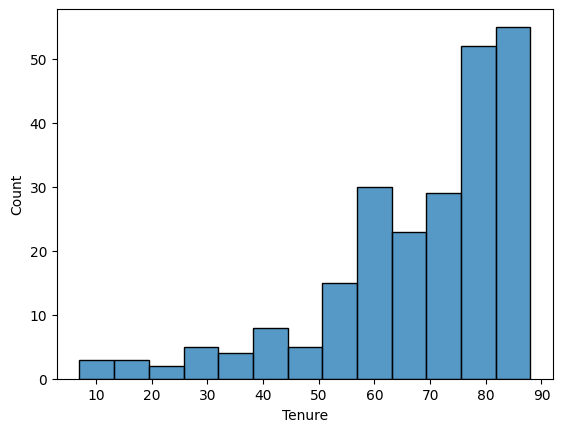

In [ ]:
#Build histogram plot from tenure
import seaborn as sns

sns.histplot(data=df_tenure, x='Tenure')

##Recency

In [ ]:
#Get the last purchase date for each customer

df_recency = df_prep.groupby('customer_id').date.max().reset_index()
df_recency.columns = ['customer_id','MaxPurchaseDate']
df_recency.head()

,customer_id,MaxPurchaseDate
0,1,2019-03-09
1,2,2019-02-22
2,3,2019-02-19
3,4,2019-03-22
4,5,2019-01-29


In [ ]:
# Calculate the days difference from customers last purchase

df_recency['Recency'] = (df_recency['MaxPurchaseDate'].max() - df_recency['MaxPurchaseDate']).dt.days
df_recency.head()

,customer_id,MaxPurchaseDate,Recency
0,1,2019-03-09,21
1,2,2019-02-22,36
2,3,2019-02-19,39
3,4,2019-03-22,8
4,5,2019-01-29,60


<Axes: xlabel='Recency', ylabel='Count'>

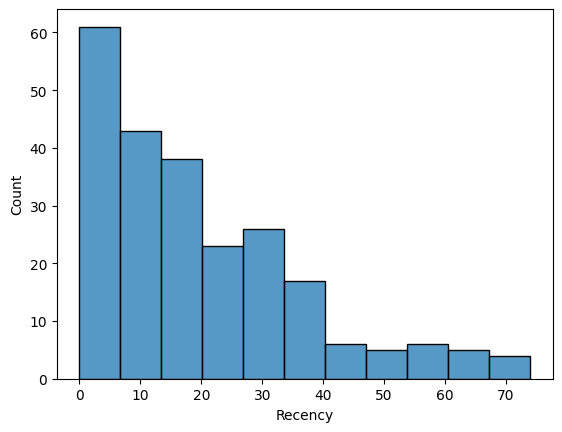

In [ ]:
#Build histogram plot from recency
sns.histplot(data=df_recency, x='Recency')

##Frequency

In [ ]:
# Get the purchase frequency for each customer

df_frequency = df_prep.groupby('customer_id').date.count().reset_index()
df_frequency.columns = ['customer_id','Frequency']
df_frequency.head()

,customer_id,Frequency
0,1,5
1,2,3
2,3,5
3,4,4
4,5,2


<Axes: xlabel='Frequency', ylabel='Count'>

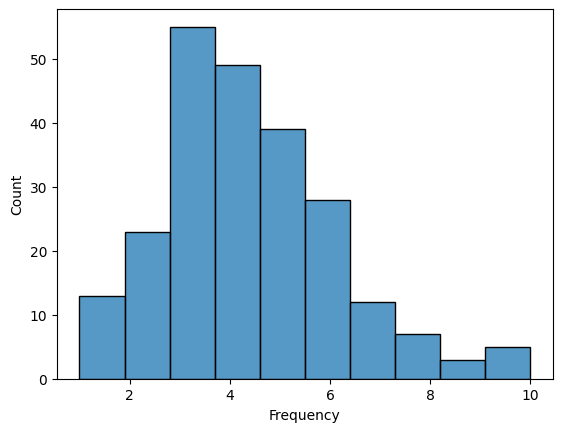

In [ ]:
#Build histogram plot from frequency
sns.histplot(data=df_frequency, x='Frequency', bins=10)

##Monetary

In [ ]:
# Get the total purchase value for each customer

df_monetary = df_prep.groupby('customer_id').total.sum().reset_index()
df_monetary.columns = ['customer_id','Monetary']
df_monetary.head()

,customer_id,Monetary
0,1,972.9195
1,2,418.1625
2,3,916.3665
3,4,1853.6280
4,5,880.7925


<Axes: xlabel='Monetary', ylabel='Count'>

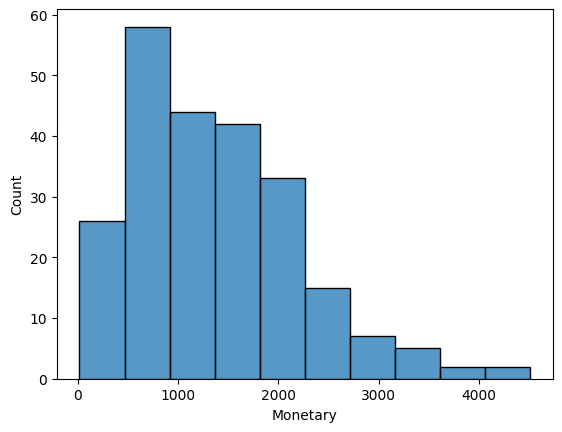

In [ ]:
#Build histogram plot from monetary
sns.histplot(data=df_monetary, x='Monetary', bins=10)

##Merging RFM T-Scores

In [ ]:
#Stitch RFM metrics
df_customer = pd.merge(df_customer, df_tenure, on='customer_id')
df_customer = pd.merge(df_customer, df_recency, on='customer_id')
df_customer = pd.merge(df_customer, df_frequency, on='customer_id')
df_customer = pd.merge(df_customer, df_monetary, on='customer_id')

#Drop MaxPurchaseDate column
df_customer = df_customer.drop('MinPurchaseDate', axis=1)
df_customer = df_customer.drop('MaxPurchaseDate', axis=1)
df_customer

,customer_id,Tenure,Recency,Frequency,Monetary
0,8,70,17,3,1295.1435
1,8,70,17,3,1295.1435
2,8,70,17,3,1295.1435
3,236,72,35,4,1911.7350
4,236,72,35,4,1911.7350
...,...,...,...,...,...
995,16,7,7,1,156.0300
996,33,19,7,3,884.5515
997,33,19,7,3,884.5515
998,33,19,7,3,884.5515


##Modeling

In [ ]:

!pip install lifetimes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00


In [ ]:
#Import BetaGeoFitter and Gammagammafitter machine learner to modeling data
from lifetimes import BetaGeoFitter, GammaGammaFitter
import lifetimes

In [ ]:
from lifetimes.utils import summary_data_from_transaction_data

##BG model

In [ ]:
#Train the BG/NBD model
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(df_customer['Frequency'], df_customer['Recency'], df_customer['Tenure'])

<lifetimes.BetaGeoFitter: fitted with 1000 subjects, a: 2.19, alpha: 0.28, b: 8.04, r: 0.48>

<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

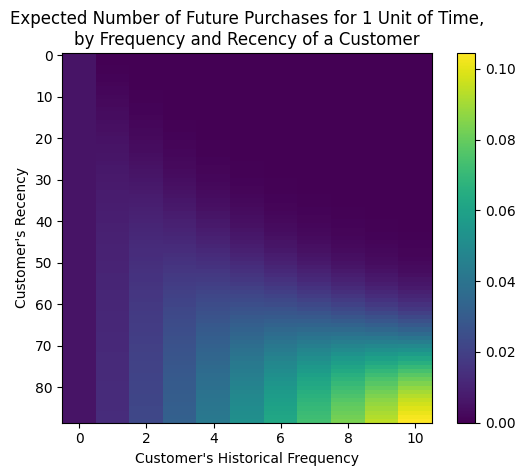

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(bgf)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

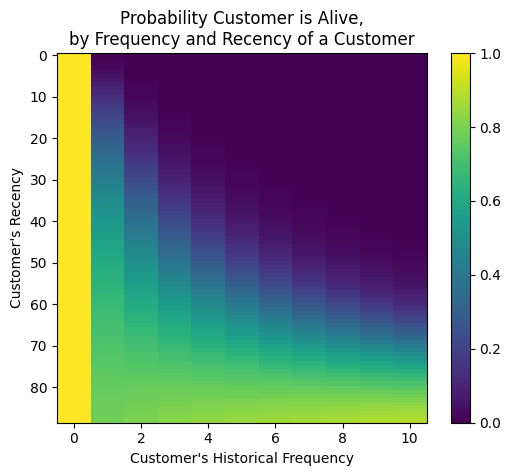

In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix
plot_probability_alive_matrix(bgf)

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

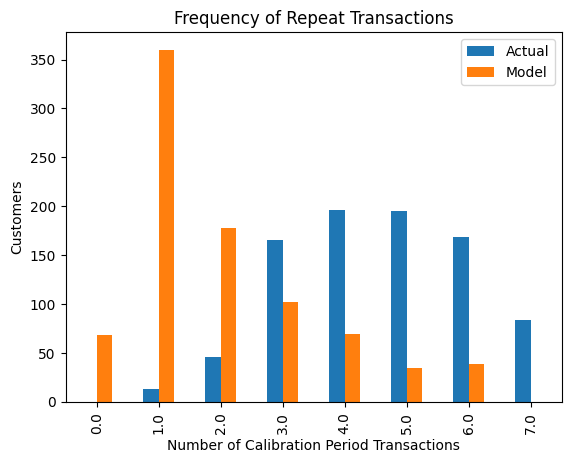

In [ ]:
# Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

###Jawaban CLV 1

In [ ]:
#1.Ekspektasi Frekuensi

#Predict the frequency for each customer in the next 3 months
t = 90
df_customer['CLTV_BG'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, df_customer['Frequency'], df_customer['Recency'], df_customer['Tenure'])

In [ ]:
df_customer

,customer_id,Tenure,Recency,Frequency,Monetary,CLTV_BG
0,8,70,17,3,1295.1435,0.102023
1,8,70,17,3,1295.1435,0.102023
2,8,70,17,3,1295.1435,0.102023
3,236,72,35,4,1911.7350,0.620245
4,236,72,35,4,1911.7350,0.620245
...,...,...,...,...,...,...
995,16,7,7,1,156.0300,4.181491
996,33,19,7,3,884.5515,0.827368
997,33,19,7,3,884.5515,0.827368
998,33,19,7,3,884.5515,0.827368


##Gama Model

In [ ]:
# Train the Gamma-Gamma model
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(df_customer["Frequency"], df_customer["Monetary"])

<lifetimes.GammaGammaFitter: fitted with 1000 subjects, p: 3.25, q: 0.21, v: 3.20>

In [ ]:
# Gamma-Gamma model works if there is a low correlation between F and M
df_customer[["Frequency","Monetary"]].corr()

,Frequency,Monetary
Frequency,1.000000,0.728349
Monetary,0.728349,1.000000


###Jawaban CLV 2

In [ ]:
#2. Ekspektasi Hitung Gamma

# Predict the monetary for each customer in the next 3 months
df_customer['CLTV_Gamma'] = ggf.customer_lifetime_value(
                                          bgf,
                                          df_customer["Frequency"],
                                          df_customer["Recency"],
                                          df_customer["Tenure"],
                                          df_customer["Monetary"],
                                          time = 3, # time period in months
                                          freq = 'D', # since our Tenure column is in days, we put 'D' here
                                          discount_rate = 0.01)

In [ ]:
df_customer

,customer_id,Tenure,Recency,Frequency,Monetary,CLTV_BG,CLTV_Gamma
0,8,70,17,3,1295.1435,0.102023,141.249317
1,8,70,17,3,1295.1435,0.102023,141.249317
2,8,70,17,3,1295.1435,0.102023,141.249317
3,236,72,35,4,1911.7350,0.620245,1240.018003
4,236,72,35,4,1911.7350,0.620245,1240.018003
...,...,...,...,...,...,...,...
995,16,7,7,1,156.0300,4.181491,865.124266
996,33,19,7,3,884.5515,0.827368,784.440538
997,33,19,7,3,884.5515,0.827368,784.440538
998,33,19,7,3,884.5515,0.827368,784.440538


In [ ]:
df_grouped = df_customer.groupby('customer_id').agg({
    'Tenure': 'mean',
    'Recency': 'mean',
    'Frequency': 'sum',
    'Monetary': 'mean',
    'CLTV_BG': 'mean',
    'CLTV_Gamma': 'mean'
}).reset_index()
df_grouped

,customer_id,Tenure,Recency,Frequency,Monetary,CLTV_BG,CLTV_Gamma
0,1,68.0,21.0,25,972.9195,4.105305e-02,41.258602
1,2,83.0,36.0,9,418.1625,5.475896e-01,245.146759
2,3,72.0,39.0,25,916.3665,7.059486e-01,668.211628
3,4,78.0,8.0,16,1853.6280,7.441169e-04,1.442312
4,5,78.0,60.0,4,880.7925,1.450534e+00,1429.325508
...,...,...,...,...,...,...,...
229,236,72.0,35.0,16,1911.7350,6.202445e-01,1240.018003
230,237,88.0,25.0,16,2035.9815,5.841037e-02,124.329742
231,238,81.0,12.0,25,1975.7955,6.982429e-04,1.424240
232,239,81.0,62.0,4,1199.6775,1.404421e+00,1883.932533


In [ ]:
df_grouped.describe()

,customer_id,Tenure,Recency,Frequency,Monetary,CLTV_BG,CLTV_Gamma
count,234.000000,234.000000,234.000000,234.000000,234.000000,2.340000e+02,2.340000e+02
mean,120.683761,68.482906,19.837607,21.991453,1380.199782,4.519982e-01,3.662557e+02
std,69.459303,17.468357,17.067127,19.875361,852.800213,7.829888e-01,6.433120e+02
min,1.000000,7.000000,0.000000,1.000000,16.275000,4.081556e-15,5.983867e-12
25%,60.250000,61.000000,6.000000,9.000000,726.894000,5.958070e-05,1.355070e-01
50%,121.500000,74.000000,16.500000,16.000000,1274.395500,4.172366e-02,4.742106e+01
75%,180.750000,81.000000,28.000000,25.000000,1878.835875,6.578523e-01,5.097885e+02
max,240.000000,88.000000,74.000000,100.000000,4510.002000,4.181491e+00,4.317704e+03


##RFM

In [ ]:
# Remove duplicate rows based on 'invoice_id'
rfm_prep = df.drop_duplicates(subset='invoice_id')

# Sort data by 'invoice_id' and 'customer_id' in ascending order
rfm_prep = cleaned_data.sort_values(by=['invoice_id', 'customer_id'])

#b. cleansing data and sorted data
rfm_prep

,invoice_id,customer_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin_ratio,gross_income,rating
1473,101-17-6199,8,A,Yangon,Normal,Male,Food and beverages,45.79,7,16.0265,336.5565,2019-03-13,19:44,Credit card,320.53,4.761905,16.0265,7.0
315,101-81-4070,236,C,Naypyitaw,Member,Female,Health and beauty,62.82,2,6.2820,131.9220,2019-01-17,12:36,Ewallet,125.64,4.761905,6.2820,4.9
1630,102-06-2002,215,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,6.3125,132.5625,2019-03-20,17:52,Cash,126.25,4.761905,6.3125,6.1
1318,102-77-2261,206,C,Naypyitaw,Member,Male,Health and beauty,65.31,7,22.8585,480.0285,2019-03-05,18:02,Credit card,457.17,4.761905,22.8585,4.2
1173,105-10-6182,48,A,Yangon,Member,Male,Fashion accessories,21.48,2,2.1480,45.1080,2019-02-27,12:22,Ewallet,42.96,4.761905,2.1480,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,894-41-5205,198,C,Naypyitaw,Normal,Female,Food and beverages,43.18,8,17.2720,362.7120,2019-01-19,19:39,Credit card,345.44,4.761905,17.2720,8.3
976,895-03-6665,115,B,Mandalay,Normal,Female,Fashion accessories,36.51,9,16.4295,345.0195,2019-02-16,10:52,Cash,328.59,4.761905,16.4295,4.2
1308,895-66-0685,138,B,Mandalay,Member,Male,Food and beverages,18.08,3,2.7120,56.9520,2019-03-05,19:46,Ewallet,54.24,4.761905,2.7120,8.0
513,896-34-0956,15,A,Yangon,Normal,Male,Fashion accessories,21.32,1,1.0660,22.3860,2019-01-26,12:43,Cash,21.32,4.761905,1.0660,5.9


In [ ]:
# To track the time-series trends, break the column by year, month, and day
rfm_prep['year'] = df['date'].dt.year
rfm_prep['month'] = df['date'].dt.month
rfm_prep['day'] = df['date'].dt.day

In [ ]:
rfm_prep

,invoice_id,customer_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,...,date,time,payment,cogs,gross_margin_ratio,gross_income,rating,year,month,day
1473,101-17-6199,8,A,Yangon,Normal,Male,Food and beverages,45.79,7,16.0265,...,2019-03-13,19:44,Credit card,320.53,4.761905,16.0265,7.0,2019,3,13
315,101-81-4070,236,C,Naypyitaw,Member,Female,Health and beauty,62.82,2,6.2820,...,2019-01-17,12:36,Ewallet,125.64,4.761905,6.2820,4.9,2019,1,17
1630,102-06-2002,215,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,6.3125,...,2019-03-20,17:52,Cash,126.25,4.761905,6.3125,6.1,2019,3,20
1318,102-77-2261,206,C,Naypyitaw,Member,Male,Health and beauty,65.31,7,22.8585,...,2019-03-05,18:02,Credit card,457.17,4.761905,22.8585,4.2,2019,3,5
1173,105-10-6182,48,A,Yangon,Member,Male,Fashion accessories,21.48,2,2.1480,...,2019-02-27,12:22,Ewallet,42.96,4.761905,2.1480,6.6,2019,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,894-41-5205,198,C,Naypyitaw,Normal,Female,Food and beverages,43.18,8,17.2720,...,2019-01-19,19:39,Credit card,345.44,4.761905,17.2720,8.3,2019,1,19
976,895-03-6665,115,B,Mandalay,Normal,Female,Fashion accessories,36.51,9,16.4295,...,2019-02-16,10:52,Cash,328.59,4.761905,16.4295,4.2,2019,2,16
1308,895-66-0685,138,B,Mandalay,Member,Male,Food and beverages,18.08,3,2.7120,...,2019-03-05,19:46,Ewallet,54.24,4.761905,2.7120,8.0,2019,3,5
513,896-34-0956,15,A,Yangon,Normal,Male,Fashion accessories,21.32,1,1.0660,...,2019-01-26,12:43,Cash,21.32,4.761905,1.0660,5.9,2019,1,26


In [ ]:
# Let's populate the dataset for the RFM
today_date = dt.datetime(2019, 3, 30)
rfm = df.groupby('customer_id').agg({'date': lambda date: (today_date - date.max()).days,
                                     'invoice_id': lambda invoice_id: invoice_id.nunique(),
                                     'total': lambda total: total.sum()})

rfm.head(15)

,date,invoice_id,total
customer_id,,,
1,20,9,1521.5025
2,21,5,731.4825
3,28,8,1428.4725
4,8,9,2681.5320
5,20,5,1881.9675
6,11,6,1745.7720
7,7,6,1136.7090
8,17,4,1530.8265
9,2,14,4926.4635


In [ ]:
# Create columns for each of RFM and make score columns of each RFM with the 5 Likert Scale to calculate the total RFM scor
rfm.columns = ['recency', 'frequency', 'monetary']

rfm["recency_score"] = pd.qcut(rfm['recency'], 4, labels=[1, 2, 3, 4])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 4, labels=[4, 3, 2, 1])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 4, labels=[4, 3, 2, 1])

ValueError: Length mismatch: Expected axis has 8 elements, new values have 3 elements

In [ ]:
rfm

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
customer_id,,,,,,
1,20,9,1521.5025,4,2,4
2,21,5,731.4825,4,4,4
3,28,8,1428.4725,4,2,4
4,8,9,2681.5320,2,2,2
5,20,5,1881.9675,4,4,3
...,...,...,...,...,...,...
236,20,6,2263.1175,4,3,3
237,12,9,2564.0790,3,1,2
238,12,7,2993.9280,3,2,2


In [ ]:
# Kuartil untuk monetary
monetary_quartiles = rfm['monetary'].quantile([0.25, 0.5, 0.75])
print("Monetary Quartiles:\n", monetary_quartiles)

# Kuartil untuk frequency
frequency_quartiles = rfm['frequency'].quantile([0.25, 0.5, 0.75])
print("Frequency Quartiles:\n", frequency_quartiles)

# Kuartil untuk recency
recency_quartiles = rfm['recency'].quantile([0.75, 0.5, 0.25])
print("Recency Quartiles:\n", recency_quartiles)


Monetary Quartiles:
 0.25    1530.787125
0.50    2327.734500
0.75    3089.837625
Name: monetary, dtype: float64
Frequency Quartiles:
 0.25    6.0
0.50    7.0
0.75    9.0
Name: frequency, dtype: float64
Recency Quartiles:
 0.75    17.0
0.50     9.0
0.25     4.0
Name: recency, dtype: float64


In [ ]:
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str)
                    + rfm['monetary_score'].astype(str))
rfm.head(15)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_id,,,,,,,
1,20,9,1521.5025,4,2,4,424
2,21,5,731.4825,4,4,4,444
3,28,8,1428.4725,4,2,4,424
4,8,9,2681.5320,2,2,2,222
5,20,5,1881.9675,4,4,3,443
6,11,6,1745.7720,3,4,3,343
7,7,6,1136.7090,2,4,4,244
8,17,4,1530.8265,3,4,3,343
9,2,14,4926.4635,1,1,1,111


In [ ]:
# Specifically assign the name of each segmentation.
seg_map = {
    r'111': 'Best Customer',
    r'[1-4][1-2][1-4]': 'Loyal Customers',
    r'[1-4][1-4]1': 'Big Spenders',
    r'444': 'Lost Customers',
    r'[3-4][1-4][1-3]' : 'Retarget Customer',
    r'[1-4]4[3-4]' : 'One-time Customer',
    r'14[1-4]' : 'New Customer',
    r'[1-4][3-4][2-4]' : 'Occasional Customer',
}

In [ ]:
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

rfm

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
customer_id,,,,,,,,
1,20,9,1521.5025,4,2,4,424,Loyal Customers
2,21,5,731.4825,4,4,4,444,Lost Customers
3,28,8,1428.4725,4,2,4,424,Loyal Customers
4,8,9,2681.5320,2,2,2,222,Loyal Customers
5,20,5,1881.9675,4,4,3,443,Retarget Customer
...,...,...,...,...,...,...,...,...
236,20,6,2263.1175,4,3,3,433,Retarget Customer
237,12,9,2564.0790,3,1,2,312,Loyal Customers
238,12,7,2993.9280,3,2,2,322,Loyal Customers


In [ ]:
# Let's check the statistics of RFM
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency        frequency           monetary      
                          mean count       mean count         mean count
segment                                                                 
Best Customer         1.384615    13  11.153846    13  4089.926885    13
Big Spenders         10.300000    10   6.500000    10  3390.123450    10
Lost Customers       31.833333    18   4.444444    18   952.369250    18
Loyal Customers       9.158879   107   9.205607   107  2915.444916   107
New Customer          2.000000     1   5.000000     1  2537.104500     1
Occasional Customer   6.529412    34   6.352941    34  1836.698603    34
One-time Customer     7.444444    27   4.407407    27  1221.296611    27
Retarget Customer    22.166667    30   5.800000    30  2108.044750    30

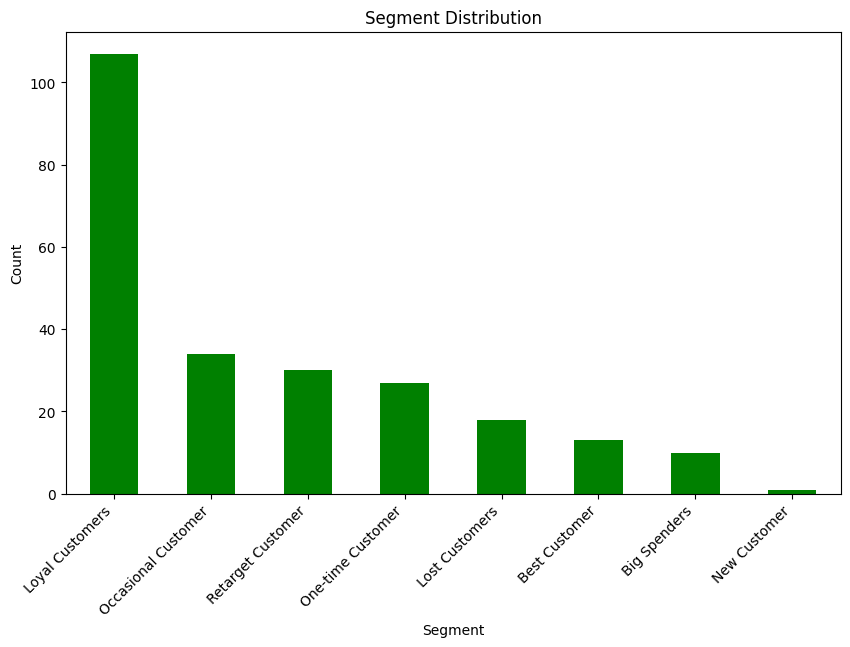

In [ ]:
segment_counts = rfm['segment'].value_counts()
segment_counts.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
segment_percentage = (segment_counts / segment_counts.sum()) * 100
print("Percentage of each segment:")
print(segment_percentage)

Percentage of each segment:
segment
Loyal Customers        44.583333
Occasional Customer    14.166667
Retarget Customer      12.500000
One-time Customer      11.250000
Lost Customers          7.500000
Best Customer           5.416667
Big Spenders            4.166667
New Customer            0.416667
Name: count, dtype: float64


In [ ]:
rfm.to_excel('rfmtrxtakehometest.xlsx', index=False)

In [ ]:
rfm

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
customer_id,,,,,,,,
1,20,9,1521.5025,4,2,4,424,Loyal Customers
2,21,5,731.4825,4,4,4,444,Lost Customers
3,28,8,1428.4725,4,2,4,424,Loyal Customers
4,8,9,2681.5320,2,2,2,222,Loyal Customers
5,20,5,1881.9675,4,4,3,443,Retarget Customer
...,...,...,...,...,...,...,...,...
236,20,6,2263.1175,4,3,3,433,Retarget Customer
237,12,9,2564.0790,3,1,2,312,Loyal Customers
238,12,7,2993.9280,3,2,2,322,Loyal Customers


In [ ]:
merged_df = pd.merge(rfm_prep, rfm, on='customer_id', how='left')
merged_df

,invoice_id,customer_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,...,month,day,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,101-17-6199,8,A,Yangon,Normal,Male,Food and beverages,45.79,7,16.0265,...,3,13,17,4,1530.8265,3,4,3,343,Retarget Customer
1,101-81-4070,236,C,Naypyitaw,Member,Female,Health and beauty,62.82,2,6.2820,...,1,17,20,6,2263.1175,4,3,3,433,Retarget Customer
2,102-06-2002,215,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,6.3125,...,3,20,10,5,1163.6310,3,4,4,344,One-time Customer
3,102-77-2261,206,C,Naypyitaw,Member,Male,Health and beauty,65.31,7,22.8585,...,3,5,4,7,1229.8755,1,2,4,124,Loyal Customers
4,105-10-6182,48,A,Yangon,Member,Male,Fashion accessories,21.48,2,2.1480,...,2,27,31,7,2595.0330,4,3,2,432,Retarget Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,894-41-5205,198,C,Naypyitaw,Normal,Female,Food and beverages,43.18,8,17.2720,...,1,19,7,9,2444.8200,2,1,2,212,Loyal Customers
996,895-03-6665,115,B,Mandalay,Normal,Female,Fashion accessories,36.51,9,16.4295,...,2,16,2,8,2675.5365,1,2,2,122,Loyal Customers
997,895-66-0685,138,B,Mandalay,Member,Male,Food and beverages,18.08,3,2.7120,...,3,5,1,8,2130.2715,1,2,3,123,Loyal Customers
998,896-34-0956,15,A,Yangon,Normal,Male,Fashion accessories,21.32,1,1.0660,...,1,26,8,12,2195.4765,2,1,3,213,Loyal Customers


In [ ]:
#merged_df.to_excel('newrfmafter.xlsx', index=False)